In [1]:
import sys
import os
sys.path.append("/cluster/home/vogtva/pde-data-gen")
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.animation import FuncAnimation
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import os
import glob
import pandas as pd
import json
from functools import partial

import src.db_tools as db_tools
from src.db_tools import (
    get_dataset,
    filter_df,
    filter_dataset,
    expand_json_column,
    make_animation,
    metrics_grid,
    plot_ball_behavior,
    plot_all_trajectories,
)

In [3]:
model = "gray_scott"
ds_id = "new_ball"
ds, output_dir = get_dataset(model, ds_id)
df = ds.df
df["op"] = df["original_point"].astype(str)
df["ic"] = df["initial_condition"].astype(str)
df["du_dv"] = df.Du / df.Dv
df['ratio_b_a'] = df['B'] / df['A']
df['ratio_dv_du'] = df['Du'] / df['Dv']

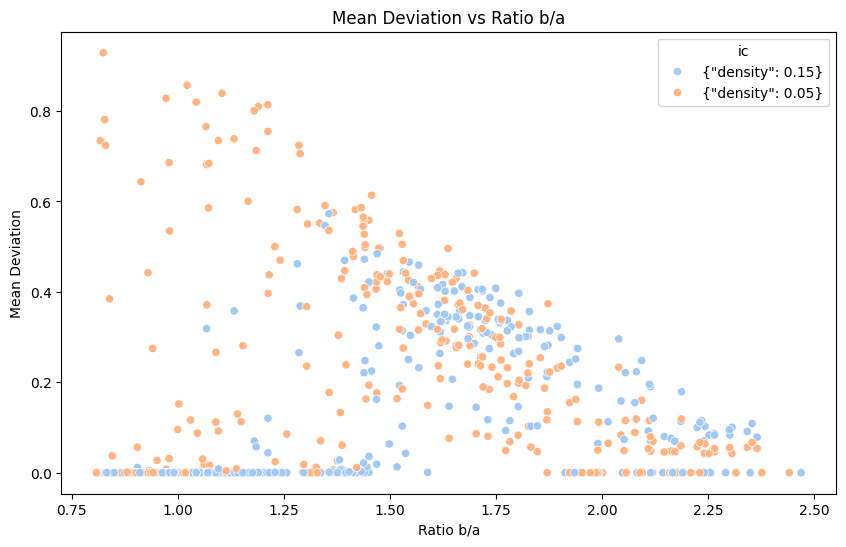

In [4]:
sns.set_palette("pastel")
# for dudv, df1 in df.groupby("du_dv"):
#     print(dudv)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ratio_b_a', y='rel_std_u', hue="ic")
plt.xlabel('Ratio b/a')
plt.ylabel('Mean Deviation')
plt.title('Mean Deviation vs Ratio b/a')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [ ]:
# for op, df1 in df.groupby("op"):
#     fig = plot_ball_behavior(df1, start_frame=80, metric="std", joint=False)
#     fig.show()

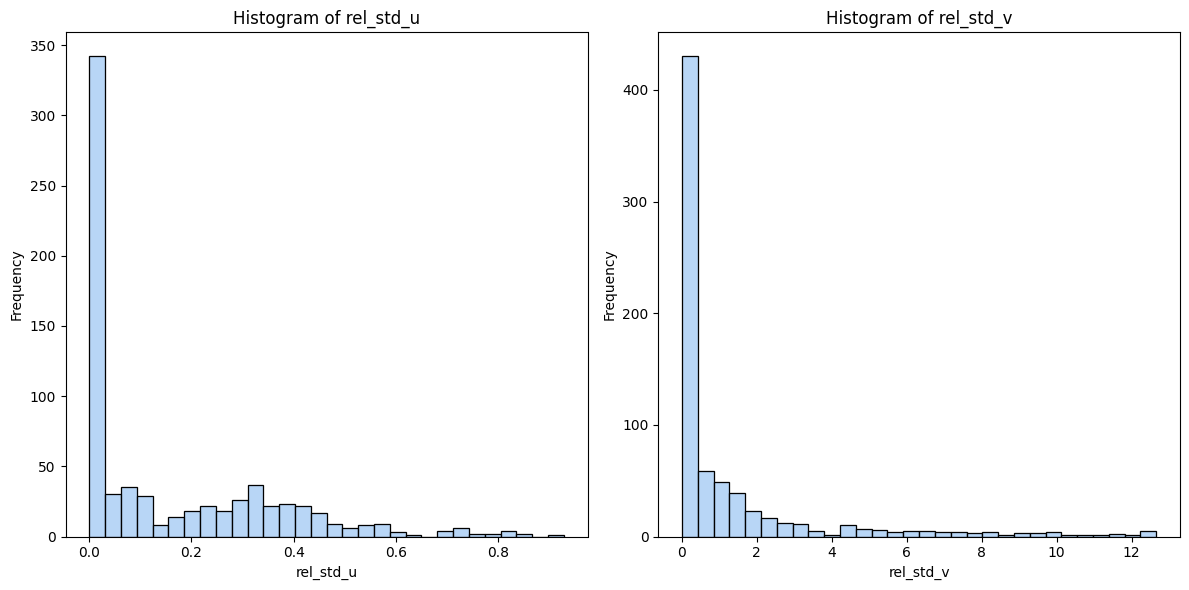

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['rel_std_u'], bins=30, ax=axes[0])
axes[0].set_xlabel('rel_std_u')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of rel_std_u')

sns.histplot(df['rel_std_v'], bins=30, ax=axes[1])
axes[1].set_xlabel('rel_std_v')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of rel_std_v')
plt.tight_layout()
plt.show() 

In [6]:
df_u = df[df.rel_std_u < 1e-1]
# print(len(df), len(df_u))
# sns.histplot(df_u, x="rel_std_v", hue="ic", multiple="stack")
df_conv = df_u[df_u.rel_std_v < 4]
df_int = df_u[df_u.rel_std_v >= 4]

In [7]:
df1 = df_conv.sample(n=5)
df2 = df_int.sample(n=5)
df1 = df1.reset_index()
df2 = df2.reset_index();

In [8]:
start_frame = 0

0    0.000028
1    0.000048
2    0.008053
3    0.000036
4    0.000051
Name: rel_std_v, dtype: float64


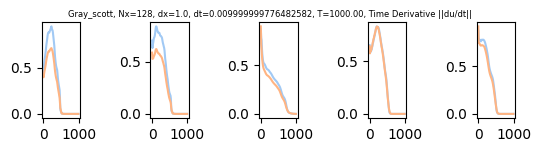

In [10]:
print(df1["rel_std_v"])
# metrics_grid(df1, start_frame, var1="", metric="std", scale=0.3);
metrics_grid(filter_dataset(ds, df1), 0, var1="", metric="dt", scale=0.3);

# for i, row in df1.iterrows():
#     make_animation(get_data(row), i, "out/gs")